<a href="https://colab.research.google.com/github/daniel542813x/deepLearning/blob/main/clasificacionBinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers, regularizers
import matplotlib.pyplot as plt

In [9]:
( train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
"""
Creamos la funcion vectorizar que recibe:
   sequences: el dataset de entrada
   dim: cantidad de palabras distintas que puede tener el dataset

| Cabe resaltar que el dataset de entrada lo que debe tener en cada registro es
| la lista con los identificadores de cada palabra que contiene la reseña
"""
def vectorizar(sequences, dim=10000):
    # Creamos una matriz restults del tamaño de la cantiad de registros
    # del dataset por la cantidad de palabras distintas (dim), esta matriz será el nuevo dataset
    # con cada una de las reseñas tokenizadas
    restults = np.zeros((len(sequences),dim))

    # Creamos un ciclo que toma dos valores:
    # - i: contiene el índice de la fila de cada registro, este indice lo obtenemos con enumerate()
    # - sequences: contiene la lista almacenada dentro de cada registro
    # Este ciclo se encarga de asignar a results las palabras que contiene cada reseña
    for i, sequences in enumerate(sequences):
        # En la fila i y la columna con el identificador dentro de la lista asignamos un 1
        restults[i,sequences]=1

    # Regresamos el dataset y sus palabras vectorizadas
    return restults

In [10]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0672 - accuracy: 0.9849 - val_loss: 0.3516 - val_accuracy: 0.8769
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0614 - accuracy: 0.9866 - val_loss: 0.3575 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0557 - accuracy: 0.9887 - val_loss: 0.3686 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0504 - accuracy: 0.9897 - val_loss: 0.3876 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0451 - accuracy: 0.9917 - val_loss: 0.3970 - val_accuracy: 0.8793
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0408 - accuracy: 0.9931 - val_loss: 0.4131 - val_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0372 - accuracy: 0.9937 - val_loss: 0.4248 - val_accuracy: 0.8728
Epoch 8/20
30

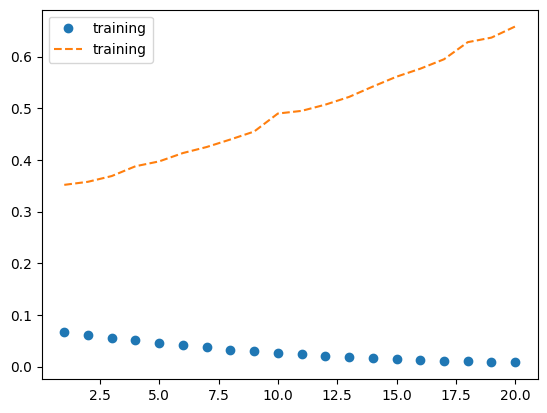

In [33]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,'o',label = 'training')
plt.plot(epoch,val_loss_values,'--',label = 'training')

plt.legend()
plt.show()

In [34]:
 model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.7061 - accuracy: 0.8571


[0.7060647010803223, 0.8570799827575684]

**Reduccion de overfit**

In [35]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape= (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

history_two = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6308 - accuracy: 0.6523 - val_loss: 0.5823 - val_accuracy: 0.7562
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5479 - accuracy: 0.7975 - val_loss: 0.5312 - val_accuracy: 0.7974
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4953 - accuracy: 0.8519 - val_loss: 0.4947 - val_accuracy: 0.8594
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4535 - accuracy: 0.8839 - val_loss: 0.4641 - val_accuracy: 0.8619
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4169 - accuracy: 0.9037 - val_loss: 0.4458 - val_accuracy: 0.8503
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3852 - accuracy: 0.9163 - val_loss: 0.4203 - val_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3560 - accuracy: 0.9276 - val_loss: 0.4028 - val_accuracy: 0.8806
Epoch 8/20
30

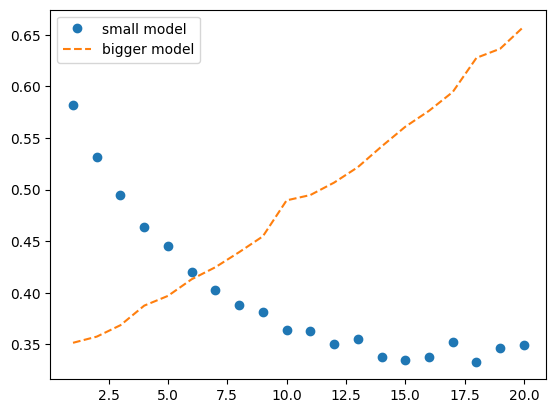

In [36]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
val_loss_values_two = history_two.history['val_loss']


epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_two,'o',label = 'small model')
plt.plot(epoch,val_loss_values,'--',label = 'bigger model')

plt.legend()
plt.show()

**Regularizacion**

In [42]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape= (10000,), kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

history3 = model3.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5725 - accuracy: 0.7717 - val_loss: 0.4425 - val_accuracy: 0.8628
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3665 - accuracy: 0.8959 - val_loss: 0.3662 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2983 - accuracy: 0.9134 - val_loss: 0.3333 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2535 - accuracy: 0.9313 - val_loss: 0.3291 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2309 - accuracy: 0.9390 - val_loss: 0.3332 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2118 - accuracy: 0.9477 - val_loss: 0.3767 - val_accuracy: 0.8750
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1997 - accuracy: 0.9526 - val_loss: 0.3483 - val_accuracy: 0.8852
Epoch 8/20
30

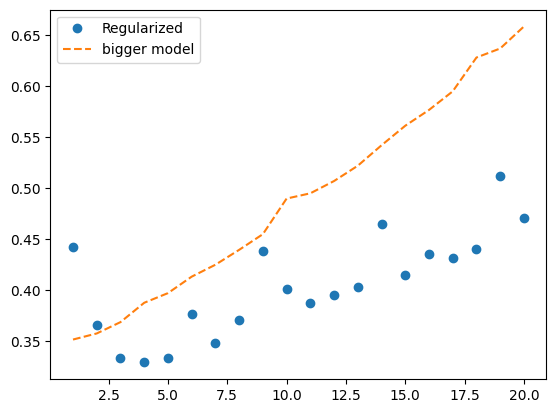

In [48]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
val_loss_values3 = history3.history['val_loss']


epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3,'o',label = 'Regularized')
plt.plot(epoch,val_loss_values,'--',label = 'bigger model')

plt.legend()
plt.show()

DropOut

In [43]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape= (10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = 'accuracy')

history4 = model4.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.6581 - accuracy: 0.6038 - val_loss: 0.5792 - val_accuracy: 0.7998
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5678 - accuracy: 0.7271 - val_loss: 0.4883 - val_accuracy: 0.8568
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4950 - accuracy: 0.7965 - val_loss: 0.4150 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4349 - accuracy: 0.8330 - val_loss: 0.3585 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3832 - accuracy: 0.8614 - val_loss: 0.3199 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3303 - accuracy: 0.8846 - val_loss: 0.2947 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2993 - accuracy: 0.9025 - val_loss: 0.2847 - val_accuracy: 0.8888
Epoch 8/20
30

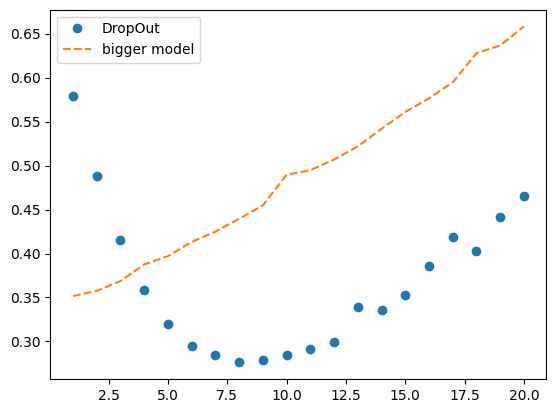

In [49]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
val_loss_values4 = history4.history['val_loss']


epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4,'o',label = 'DropOut')
plt.plot(epoch,val_loss_values,'--',label = 'bigger model')

plt.legend()
plt.show()